## Sense Check and Explore the April 2022 Race data

In [49]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from pandas import DataFrame

%matplotlib inline

In [107]:
df_Apr = pd.read_csv ('..\Data\April_2022.csv'  )
df_Apr['Month'] = "Apr"

df_Oct= pd.read_csv ('..\Data\October_2022.csv'  )
df_Oct['Month'] = "Oct"

In [108]:
df = pd.concat  ( [  df_Apr , df_Oct ] )

#### Temporary fix up - move this code to Scratch Notebook

In [152]:
df['0K_5K_SECTION_TIME']   = df['5K_MINS']
df['5K_10K_SECTION_TIME']  = df['10K_MINS']  - df['5K_MINS']
df['10K_15K_SECTION_TIME'] = df['15K_MINS']  - df['10K_MINS']
df['15K_20K_SECTION_TIME'] = df['20K_MINS']  - df['15K_MINS']

In [157]:
df.Month.value_counts()

Oct    13160
Apr    11572
Name: Month, dtype: int64

In [163]:
# Now Find the means for each section and Category
df.groupby (['Month' ] ).agg (
     num_runners=('RACE_NUMBER', 'count' )
    ,time_mins = ('CHIP_TIME_MINS', 'mean' )
).reset_index(drop=False)
#df_agg1.sort_values('CATEGORY')

,Month,num_runners,time_mins
0,Apr,11572,130.399274
1,Oct,13160,130.934758


In [98]:
df.loc [ df.CATEGORY.isna(), 'CATEGORY'] = 'NOT_GIVEN'
# There are two 'NOT_GIVEN' rows - drop them

df = df [ df.CATEGORY != 'NOT_GIVEN'  ]

#### Columns

In [44]:
df.columns

Index(['RACE_NUMBER', 'FIRST_NAME', 'SURNAME', 'GENDER', 'GENDER_POSITION',
       'CATEGORY', 'CATEGORY_POSITION', 'CLUB', '5K', '10K', '15K', '20K',
       'OVERALL_POSITION', 'CHIP_TIME', 'CHIP_POSITION', 'CHIP_TIME_MINS',
       '5K_MINS', '10K_MINS', '15K_MINS', '20K_MINS', 'min_per_km_course',
       'min_per_km_0_5', 'min_per_km_6_10', 'min_per_km_11_15',
       'min_per_km_16_20', 'min_per_km_21_FINISH', '5K_10K_SECTION_TIME',
       '10K_15K_SECTION_TIME', '15K_20K_SECTION_TIME', 'Month', 'ENTRY_STATUS',
       '0K_5K_SECTION_TIME'],
      dtype='object')

#### How can we group up the ages

In [114]:
# Now Find the means for each section and Category
df_agg1 =   df.groupby (['CATEGORY', 'Month' ] ).agg (
     num_runners=('RACE_NUMBER', 'count' )
    ,time_mins = ('CHIP_TIME_MINS', 'mean' )
).reset_index(drop=False)
df_agg1.sort_values('CATEGORY')

,CATEGORY,Month,num_runners,time_mins
0,F35+,Apr,740,139.420428
1,F35+,Oct,763,139.701900
2,F40+,Apr,828,141.822846
3,F40+,Oct,852,141.804206
4,F45+,Apr,729,143.585848
5,F45+,Oct,670,142.845796
6,F50+,Apr,544,147.560999
7,F50+,Oct,596,145.279279
9,F55+,Oct,332,148.149046
8,F55+,Apr,329,146.216565


#### Recategorize

In [141]:
df['SPEED_CATEGORY'] = "Normal"

In [142]:
#df.loc [df.CATEGORY.fillna ('No').str.contains ('OPEN')  , 'ENTRY_STATUS'] = "Elite"

boolIndex = np.logical_and ( df.CHIP_TIME_MINS <= 60 + 30  , df.GENDER== 'Male')
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Elite'

boolIndex = np.logical_and ( df.CHIP_TIME_MINS <= 60 + 40 , df.GENDER== 'Female')
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Elite'

#### label our rows in the dataset.



In [ ]:

boolIndex = np.logical_and ( df.FIRST_NAME.str.contains ('John') ,
                             df.SURNAME.str.contains ( 'Steed'), 
                             df.Month == 'Apr'
                           )
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Apr'

boolIndex = np.logical_and ( df.FIRST_NAME.str.contains ('John') ,
                             df.SURNAME.str.contains ( 'Steed'), 
                             df.Month == 'Oct'
                           )
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Oct'


boolIndex = np.logical_and ( df.FIRST_NAME.str.contains ('Ellena') ,
                             df.SURNAME.str.contains ( 'Green'), 
                             df.Month == 'Apr'
                           )
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Apr'

boolIndex = np.logical_and ( df.FIRST_NAME.str.contains ('Ellena') ,
                             df.SURNAME.str.contains ( 'Green'), 
                             df.Month == 'Oct'
                           )
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Oct'







In [ ]:
# Now Find the means for each section and Category
df_agg1 =   df.groupby (['SPEED_CATEGORY',  'GENDER', 'Month' ] ).agg (
     num_runners=('RACE_NUMBER', 'count' )
    ,time_mins = ('CHIP_TIME_MINS', 'mean' )
).reset_index(drop=False)
df_agg1.sort_values('SPEED_CATEGORY')

#### Get a Long Data Frame

In [229]:
df.columns

Index(['RACE_NUMBER', 'FIRST_NAME', 'SURNAME', 'GENDER', 'GENDER_POSITION',
       'CATEGORY', 'CATEGORY_POSITION', 'CLUB', '5K', '10K', '15K', '20K',
       'OVERALL_POSITION', 'CHIP_TIME', 'CHIP_POSITION', 'CHIP_TIME_MINS',
       '5K_MINS', '10K_MINS', '15K_MINS', '20K_MINS', 'min_per_km_course',
       'min_per_km_0_5', 'min_per_km_6_10', 'min_per_km_11_15',
       'min_per_km_16_20', 'min_per_km_21_FINISH', '5K_10K_SECTION_TIME',
       '10K_15K_SECTION_TIME', '15K_20K_SECTION_TIME', 'Month',
       'SPEED_CATEGORY', '0K_5K_SECTION_TIME'],
      dtype='object')

In [243]:
# Create a new frame indexed by gender, category and race section.
# This is so that mean times/speeds can be calculated for gruoups.

df_long = pd.concat ( [

DataFrame ({ 'GENDER'    : df.GENDER,\
                          'SPEED_CATEGORY'   : df.SPEED_CATEGORY,\
                          'SECTION_TIME': df['0K_5K_SECTION_TIME'],
                          'SECTION'   :'0-5' })
,
DataFrame ({ 'GENDER'   : df.GENDER,\
                            'SPEED_CATEGORY'  : df.SPEED_CATEGORY,\
                            'SECTION_TIME': df['5K_10K_SECTION_TIME'],\
                            'SECTION'   :'6-10' })
,
DataFrame ({ 'GENDER'   : df.GENDER,\
                            'SPEED_CATEGORY'  : df.SPEED_CATEGORY,\
                            'SECTION_TIME': df['10K_15K_SECTION_TIME'],\
                            'SECTION'   :'11-15' })
,
DataFrame ({ 'GENDER'   : df.GENDER,\
                            'SPEED_CATEGORY'  : df.SPEED_CATEGORY,\
                            'SECTION_TIME': df['15K_20K_SECTION_TIME'],\
                            'SECTION'   :'16-20' })
#,
#DataFrame ({ 'GENDER'   : df.GENDER,\
#                            'ELITE_STATUS'  : df.ENTRY_STATUS,\
#                            'SECTION_TIME': df.min_per_km_16_20,\
#                            'SECTION'   :'min_per_km_21_FINISH' })

]
)

In [244]:
# Now Find the means for each section and Category
df_agg1 =   df_long.groupby (['SPEED_CATEGORY', 'GENDER',"SECTION"] ).agg (
     SECTION_TIME=('SECTION_TIME', 'mean' )
    ,NUM_RUNNERS=('SECTION_TIME', 'count' )
).reset_index(drop=False)

In [232]:
df_agg1

,SPEED_CATEGORY,GENDER,SECTION,SECTION_TIME,NUM_RUNNERS
0,Elite,Female,0-5,21.203238,350
1,Elite,Female,11-15,21.859619,350
2,Elite,Female,16-20,22.359190,350
3,Elite,Female,6-10,21.553476,350
4,Elite,Male,0-5,19.056682,1115
5,Elite,Male,11-15,19.634709,1115
6,Elite,Male,16-20,19.933737,1115
7,Elite,Male,6-10,19.371555,1115
8,Normal,Female,0-5,32.313546,10548
9,Normal,Female,11-15,34.753699,10548


In [245]:
# Need to sort this data frame by section

codes = {'0-5':1 , '6-10':2, '11-15':3, '16-20': 4}
df_agg1['sort_order'] = df_agg1['SECTION'].map(codes)
df_agg1 = df_agg1.sort_values (['sort_order'])
df_agg1.head(2)

,SPEED_CATEGORY,GENDER,SECTION,SECTION_TIME,NUM_RUNNERS,sort_order
0,Elite,Female,0-5,21.203238,350,1
20,Us,Male,0-5,24.158333,2,1


[Text(0, 0.5, 'Section Time (mins)'), Text(0.5, 0, 'Timing Point')]

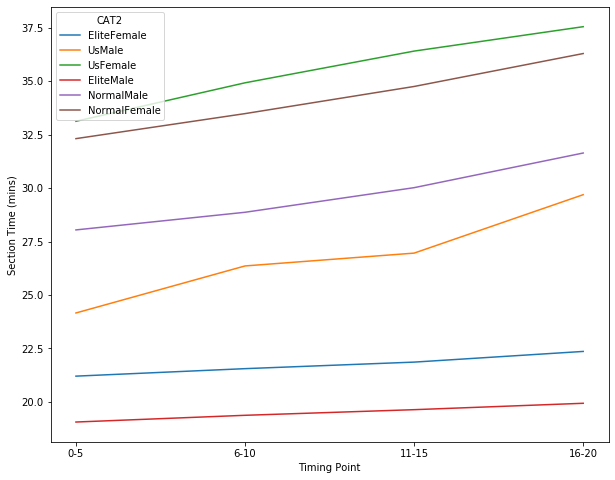

In [246]:
df_agg1['CAT2'] = df_agg1['SPEED_CATEGORY'] + df_agg1['GENDER']
 
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

g = sns.lineplot ( data = df_agg1, 
             x= "SECTION", 
              y="SECTION_TIME",
             hue='CAT2')

g.set(xlabel="Timing Point", ylabel="Section Time (mins)")

#ax.set_ylim (bottom=4)